1. В рамках промежуточной аттестации 2 вами был проведен разведочный анализ данных и тестирование гипотез для выбранного датасета
2. На основе проведенных наблюдений о взаимосвязи между переменными сформулируйте задачу классификации или регрессии, которая может иметь практическую ценность
3. Разделите датасет на обучающую (60%) и тестовую (40%) выборки. Далее тестовую выборку разделите пополам (20% и 20%):
    a) Первая половина будет использоваться для оценки качества модели. Предполагается, что здесь вы знаете наблюдаемые значения таргета и можете сравнивать их с предсказаниями
    b) Вторая половина будет использоваться для построения прогнозов. Предполагается, что здесь значения таргета вам неизвестны – как в практической ситуации использования моделей прогнозирования.
4. Обучите 3 различные модели, проведите оценку их качества на первой половине тестовой выборки
5. Для повышения качества можете пользоваться следующими приемами:
    a) Нормализация и стандартизация показателей
    b) Подбор гиперпараметров
    c) Включение / исключение дополнительных переменных
    d) Трансформация переменных (квадраты, логарифмы и т.п.)
6. Выберите ту модель и набор переменных, которые по вашему мнению дают наиболее удовлетворительное качество.
7. На основе второй половины тестовой выборки сделайте предсказание целевой переменной. На основе предсказаний сделайте рекомендации для потенциальных пользователей вашего анализа
8. Результат сохранить на GitHub и отправить в виде ссылки на файл + блокнота в формате ipynb

Помните, что просто посчитать - это половина задания. К каждому шагу нужны пояснения и описания. Старайтесь структурировать ваш код, чтобы он был понятен стороннему пользователю
Срок – до 25 ноября


In [2]:
#подключаем фрэймворки
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn import linear_model, svm
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, explained_variance_score


In [3]:
#выбираем датасэт из таблицы dataset.csv
item = 'happiness' 
package = 'wooldridge' 

#получаем датасэт с помощью statsmodels
df = sm.datasets.get_rdataset(item, package , cache=True).data


df.head()

,year,workstat,prestige,divorce,widowed,educ,reg16,babies,preteen,teens,...,occattend,regattend,y94,y96,y98,y00,y02,y04,y06,unem10
0,1994,keeping house,46.0,NaN,iap,12.0,middle atlantic,2.0,3.0,0.0,...,1.0,0.0,1,0,0,0,0,0,0,1.0
1,1994,working fulltime,22.0,no,iap,12.0,foreign,0.0,0.0,0.0,...,0.0,0.0,1,0,0,0,0,0,0,0.0
2,1994,working fulltime,29.0,no,iap,12.0,foreign,0.0,0.0,0.0,...,0.0,1.0,1,0,0,0,0,0,0,NaN
3,1994,working fulltime,42.0,yes,iap,8.0,foreign,0.0,0.0,0.0,...,0.0,0.0,1,0,0,0,0,0,0,1.0
4,1994,working parttime,36.0,NaN,NaN,13.0,middle atlantic,0.0,1.0,1.0,...,0.0,0.0,1,0,0,0,0,0,0,0.0


In [4]:
#смотрим типы данных в датасете
df.info()
# year - год рождения
# workstat - вид трудозанятости
# prestige - престижность профессии
# divorce - разведен
# widowed - вдова/вдовец
# educ - сколько лет образования закончено
# reg16 - место проживания в 16 лет (откуда родом)
#  babies - дети меньше 6
# preteen - дети 6-12 лет
# teens   - подростки 13-17
# income  - доход семьи
#  region - текущий регион проживания
#  attend - как часто посещает религиозные учереждения
#  happy   - общий индекс счатья
#  owngun  - владение оржуием
#  tvhours - ежедневный просмотр ТВ в часах
# vhappy   - признак очень счастливого человека
# mothfath16 - если жил в полноценной семье в 16 лет
# black      - чернокожий 
# gwbush04   - голосовал за буша в 2004
# female     - женщина
# blackfemale - чернокожая женщина
# gwbush00    - голосовал за буша в 2000
# occattend   - посещение церкви 3-5 раз
# regattend   - посещение церкви 6-8 раз 
# y94         - признак года рождения
# y96         
# y98         
# y00         
# y02         
# y04         
# y06          
# unem10      - если был нетрудоустроен в последние 10 лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17137 entries, 0 to 17136
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         17137 non-null  int64  
 1   workstat     17134 non-null  object 
 2   prestige     16283 non-null  float64
 3   divorce      9754 non-null   object 
 4   widowed      11096 non-null  object 
 5   educ         17093 non-null  float64
 6   reg16        17137 non-null  object 
 7   babies       17036 non-null  float64
 8   preteen      17036 non-null  float64
 9   teens        17049 non-null  float64
 10  income       15045 non-null  object 
 11  region       17137 non-null  object 
 12  attend       16864 non-null  object 
 13  happy        17137 non-null  object 
 14  owngun       11297 non-null  object 
 15  tvhours      11794 non-null  float64
 16  vhappy       17137 non-null  int64  
 17  mothfath16   17132 non-null  float64
 18  black        17137 non-null  int64  
 19  gwbu

In [5]:
#считаем количество всех детей от 0 до 18 у человека
df['children'] = df.apply(lambda row: row['babies'] + row['preteen'] + row['teens'], axis=1)
df.head()

,year,workstat,prestige,divorce,widowed,educ,reg16,babies,preteen,teens,...,regattend,y94,y96,y98,y00,y02,y04,y06,unem10,children
0,1994,keeping house,46.0,NaN,iap,12.0,middle atlantic,2.0,3.0,0.0,...,0.0,1,0,0,0,0,0,0,1.0,5.0
1,1994,working fulltime,22.0,no,iap,12.0,foreign,0.0,0.0,0.0,...,0.0,1,0,0,0,0,0,0,0.0,0.0
2,1994,working fulltime,29.0,no,iap,12.0,foreign,0.0,0.0,0.0,...,1.0,1,0,0,0,0,0,0,NaN,0.0
3,1994,working fulltime,42.0,yes,iap,8.0,foreign,0.0,0.0,0.0,...,0.0,1,0,0,0,0,0,0,1.0,0.0
4,1994,working parttime,36.0,NaN,NaN,13.0,middle atlantic,0.0,1.0,1.0,...,0.0,1,0,0,0,0,0,0,0.0,2.0


In [10]:
# проверяем дубликаты
df[df.duplicated()]
#дубликатов нет


,year,workstat,prestige,divorce,widowed,educ,reg16,babies,preteen,teens,...,regattend,y94,y96,y98,y00,y02,y04,y06,unem10,children


In [12]:
# Смотрим на null значения переменных
df.isna().sum() 

year               0
workstat           3
prestige         854
divorce         7383
widowed         6041
educ              44
reg16              0
babies           101
preteen          101
teens             88
income          2092
region             0
attend           273
happy              0
owngun          5840
tvhours         5343
vhappy             0
mothfath16         5
black              0
gwbush04       15207
female             0
blackfemale        0
gwbush00       13701
occattend        273
regattend        273
y94                0
y96                0
y98                0
y00                0
y02                0
y04                0
y06                0
unem10          5796
children         102
dtype: int64

In [14]:
### видим очень много незаполненных данных исключаем данные столбцы из датасета
df=df.dropna(thresh=len(df)-2500, axis=1)
df.isnull().sum()
#убираем лишние колонки
df=df.drop(columns=['y94','y96','y98','y00','y00','y02','y04','y06'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17137 entries, 0 to 17136
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         17137 non-null  int64  
 1   workstat     17134 non-null  object 
 2   prestige     16283 non-null  float64
 3   educ         17093 non-null  float64
 4   reg16        17137 non-null  object 
 5   babies       17036 non-null  float64
 6   preteen      17036 non-null  float64
 7   teens        17049 non-null  float64
 8   income       15045 non-null  object 
 9   region       17137 non-null  object 
 10  attend       16864 non-null  object 
 11  happy        17137 non-null  object 
 12  vhappy       17137 non-null  int64  
 13  mothfath16   17132 non-null  float64
 14  black        17137 non-null  int64  
 15  female       17137 non-null  int64  
 16  blackfemale  17137 non-null  int64  
 17  occattend    16864 non-null  float64
 18  regattend    16864 non-null  float64
 19  chil

In [16]:
#анализируем пустые значения
print(df['workstat'].value_counts())
#workstat можно заполнить значение other
df['workstat']=df['workstat'].fillna('other')

workstat
working fulltime    9214
retired             2459
keeping house       1912
working parttime    1812
school               521
unempl, laid off     485
other                396
temp not working     335
Name: count, dtype: int64


In [18]:
#babies, preteens, teens  заполняем 0
df['babies']=df['babies'].fillna(0)
df['preteen']=df['preteen'].fillna(0)
df['teens']=df['teens'].fillna(0)

In [20]:
print(df['attend'].value_counts())
#attend запишем как never
df['attend']=df['attend'].fillna('never')
df['occattend']=df['occattend'].fillna(0)
df['regattend']=df['regattend'].fillna(0)

attend
never               3213
every week          3041
once a year         2209
sevrl times a yr    2118
2-3x a month        1495
lt once a year      1382
more thn once wk    1274
once a month        1193
nrly every week      939
Name: count, dtype: int64


In [22]:
print(df['mothfath16'].value_counts())
#mothfath16 запишем как 0
df['mothfath16']=df['mothfath16'].fillna(0)

mothfath16
1.0    11872
0.0     5260
Name: count, dtype: int64


Задача: построить модель определния престижа работы на основе имеющихся данных


In [25]:
#создаем выборку с обрабатываемыми данными
df_var = df[['female','year', 'black', 'workstat', 'prestige', 'happy','educ','region','income','reg16','vhappy','mothfath16','children','attend']]
#стандартизация данных
df_var[['educ', 'prestige']] = StandardScaler().fit_transform(df_var[['educ', 'prestige']])

C:\Users\#slash\AppData\Local\Temp\ipykernel_10776\4035510606.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_var[['educ', 'prestige']] = StandardScaler().fit_transform(df_var[['educ', 'prestige']])


In [27]:
df_var.isna().sum() 

female           0
year             0
black            0
workstat         0
prestige       854
happy            0
educ            44
region           0
income        2092
reg16            0
vhappy           0
mothfath16       0
children       102
attend           0
dtype: int64

In [29]:
df_var=df_var.dropna()

<Axes: ylabel='educ'>

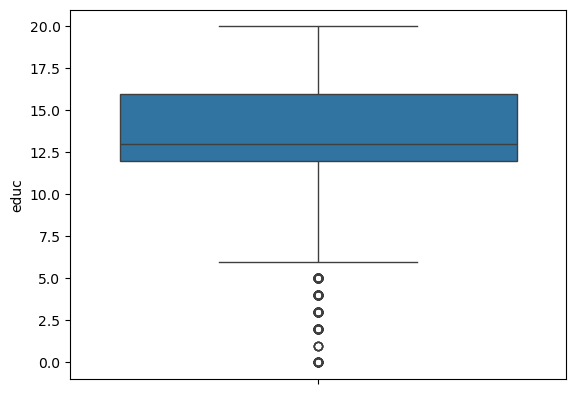

In [31]:
#смотрим выбросы
sns.boxplot(df['educ'])

<Axes: ylabel='prestige'>

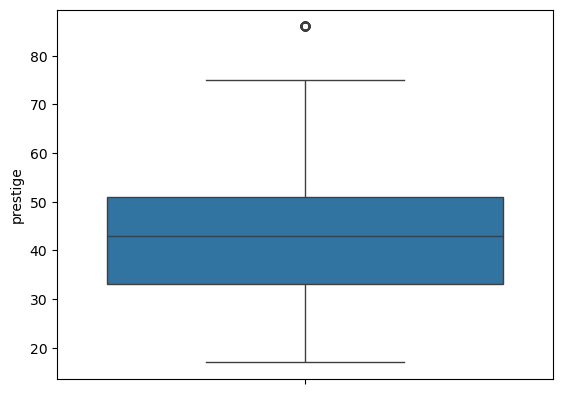

In [33]:
sns.boxplot(df['prestige'])

[1994 1996 1998 2000 2002 2004 2006]


<Axes: ylabel='year'>

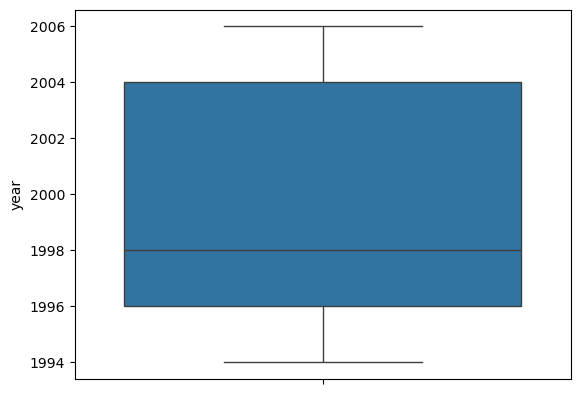

In [35]:
print(df['year'].unique())
sns.boxplot(df['year'])

<Axes: ylabel='children'>

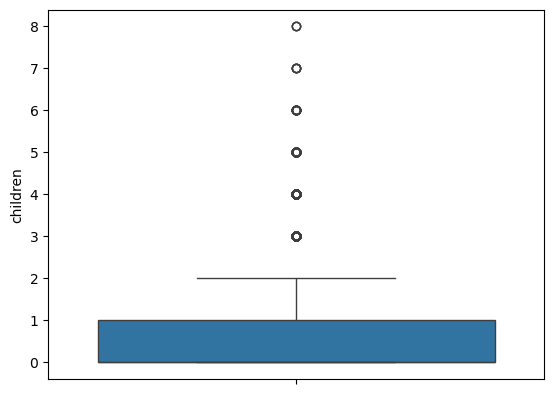

In [37]:
sns.boxplot(df['children'])

In [39]:
#убираем выбросы
df=df[(df['prestige']>21)&
        (df['prestige']<80)&
        (df['educ']>7)&
        (df['educ']<21)&
        (df['children']<3)]

C:\Users\#slash\AppData\Local\Temp\ipykernel_10776\3573871686.py:2: FutureWarning: The provided callable <function median at 0x000001FA7F6EB6A0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  result = df_var.groupby(["region"])['prestige'].aggregate(np.median).reset_index().sort_values('prestige')


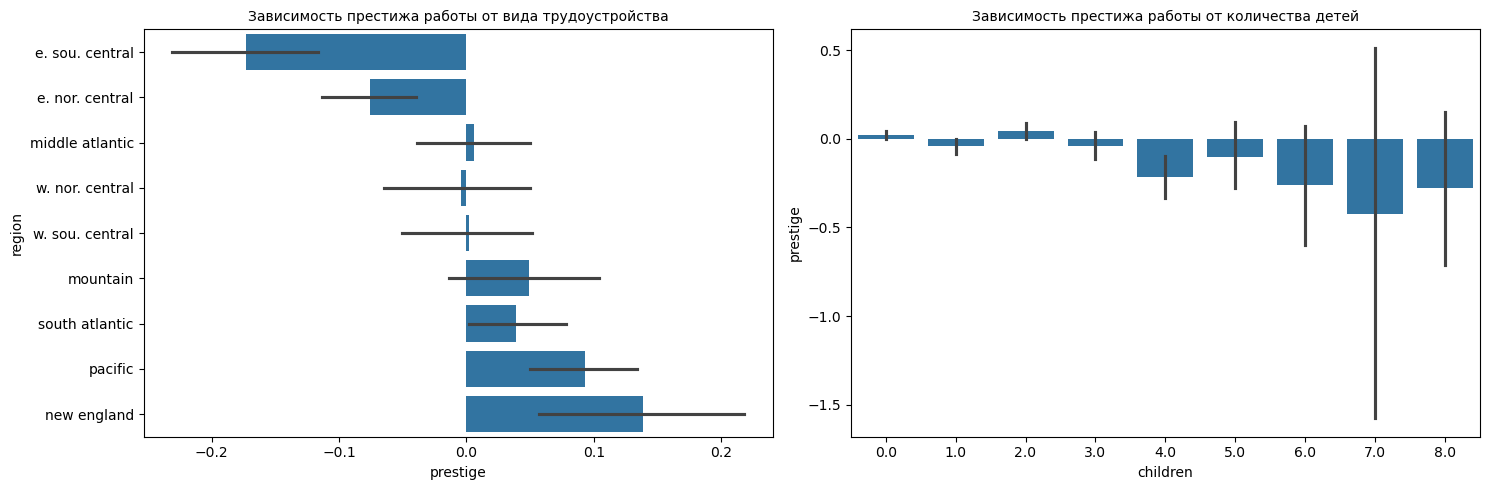

In [41]:
#Рисуем графики для просмотра линейной зависимости сортируем датасэт
result = df_var.groupby(["region"])['prestige'].aggregate(np.median).reset_index().sort_values('prestige')
fig, ax = plt.subplots(1,2, figsize = (15,5))
sns.barplot(x = 'prestige', y ='region', data = df_var, ax = ax[0],order=result["region"])
ax[0].set_title('Зависимость престижа работы от вида трудоустройства', fontsize = 10)
sns.barplot(x = 'children', y = 'prestige', data = df_var, ax = ax[1])
ax[1].set_title('Зависимость престижа работы от количества детей', fontsize = 10)
plt.tight_layout()
plt.show()

Прослеживается заивисимость престижа работы от региона.
Пол не влияет на престиж работы

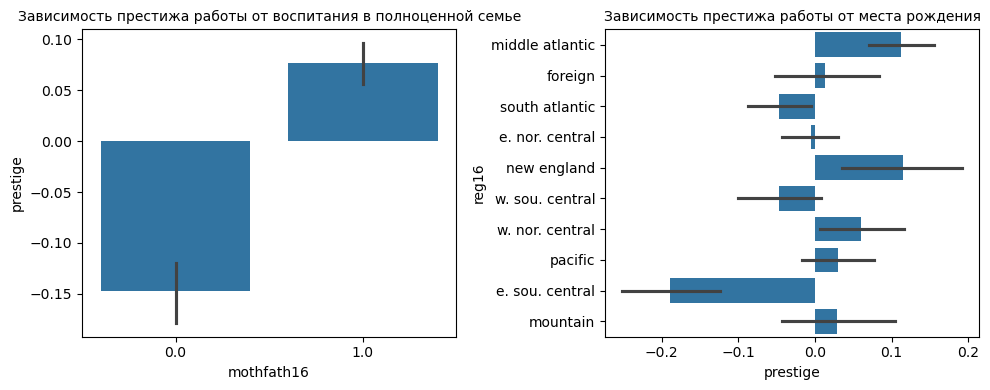

In [43]:
fig, ax = plt.subplots(1,2, figsize = (10,4))

sns.barplot(x = 'mothfath16', y = 'prestige', data = df_var, ax = ax[0])
ax[0].set_title('Зависимость престижа работы от воспитания в полноценной семье', fontsize = 10)
sns.barplot(x = 'prestige', y = 'reg16', data = df_var, ax = ax[1])
ax[1].set_title('Зависимость престижа работы от места рождения', fontsize = 10)
plt.tight_layout()
plt.show()

C:\Users\#slash\AppData\Local\Temp\ipykernel_10776\858663222.py:2: FutureWarning: The provided callable <function median at 0x000001FA7F6EB6A0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  result = df_var.groupby(["workstat"])['prestige'].aggregate(np.median).reset_index().sort_values('prestige')


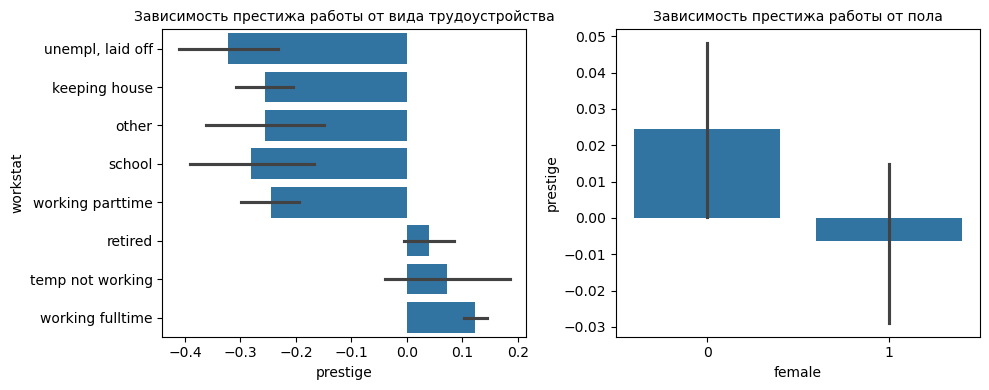

In [46]:
fig, ax = plt.subplots(1,2, figsize = (10,4))
result = df_var.groupby(["workstat"])['prestige'].aggregate(np.median).reset_index().sort_values('prestige')
sns.barplot(x = 'prestige', y ='workstat', data = df_var, ax = ax[0],order=result["workstat"])
ax[0].set_title('Зависимость престижа работы от вида трудоустройства', fontsize = 10)
sns.barplot(x = 'female', y = 'prestige', data = df_var, ax = ax[1])
ax[1].set_title('Зависимость престижа работы от пола', fontsize = 10)
plt.tight_layout()
plt.show()

Видна наглядная зависимость престижа работы от вида работы

C:\Users\#slash\AppData\Local\Temp\ipykernel_10776\2442767256.py:4: FutureWarning: The provided callable <function median at 0x000001FA7F6EB6A0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  result = df_var.groupby(["educ"])['prestige'].aggregate(np.median).reset_index().sort_values('prestige')


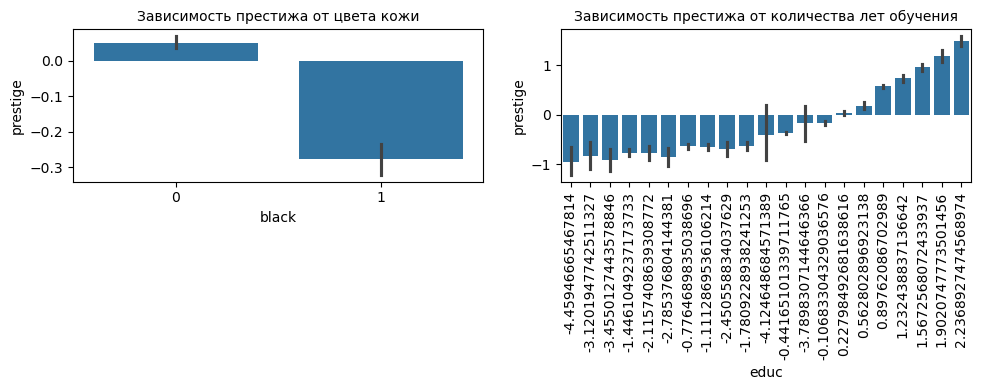

In [49]:
fig, ax = plt.subplots(1,2, figsize = (10,4))
sns.barplot(x = 'black', y ='prestige', data = df_var, ax = ax[0])
ax[0].set_title('Зависимость престижа от цвета кожи', fontsize = 10)
result = df_var.groupby(["educ"])['prestige'].aggregate(np.median).reset_index().sort_values('prestige')
sns.barplot(x = 'educ', y = 'prestige', data = df_var, ax = ax[1],order=result["educ"])
ax[1].set_title('Зависимость престижа от количества лет обучения', fontsize = 10)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Видна зависимость престижа работы от уровня счастья, места проживания, места рождения, вида трудоустройства, воспитания в полноценной семье и от цвета кожи. Зависимость престижа от количества лет обучения нелинейна

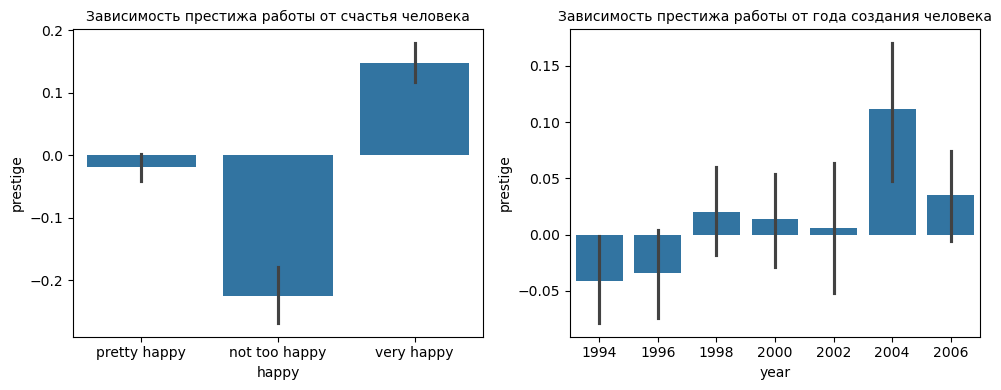

In [51]:
fig, ax = plt.subplots(1,2, figsize = (10,4))

sns.barplot(x = 'happy', y ='prestige', data = df_var, ax = ax[0])
ax[0].set_title('Зависимость престижа работы от счастья человека', fontsize = 10)

sns.barplot(x = 'year', y = 'prestige', data = df_var, ax = ax[1])
ax[1].set_title('Зависимость престижа работы от года создания человека', fontsize = 10)

plt.tight_layout()
plt.show()

Счастье человека тоже влияет на престиж работы

In [54]:
cat_vars = ['black','happy','region','workstat','reg16','attend','income'] # перечисляем категориальные переменные 
num_vars = ['year','children','educ'] # перечисляем числовые переменные 
target_var = ['prestige']

In [57]:
# Готовим матрицу X и вектор Y

X_dummies = pd.get_dummies(df_var[cat_vars], drop_first = True, dtype = int)
X_dummies.head()

,black,happy_pretty happy,happy_very happy,region_e. sou. central,region_middle atlantic,region_mountain,region_new england,region_pacific,region_south atlantic,region_w. nor. central,...,income_$15000 - 19999,income_$20000 - 24999,income_$25000 or more,income_$3000 to 3999,income_$4000 to 4999,income_$5000 to 5999,income_$6000 to 6999,income_$7000 to 7999,income_$8000 to 9999,income_lt $1000
0,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [59]:
X = df_var[num_vars]
X = pd.merge(left = X,right = X_dummies,how = 'inner',left_index = True,right_index = True)
y = df_var[target_var]

3. Разделите датасет на обучающую (60%) и тестовую (40%) выборки. Далее тестовую выборку разделите пополам (20% и 20%):

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [64]:
X_train.shape

(8586, 49)

In [66]:
X_test.shape

(5724, 49)

In [68]:
#Нормализация данных
def normalize(x_train, x_test):
    mu = np.mean(x_train, axis=0)
    std = np.std(x_train, axis=0)
    x_train_normalized = (x_train - mu) / std
    x_test_normalized = (x_test - mu) / std
    return x_train_normalized, x_test_normalized
X_train, X_test = normalize(X_train, X_test)

In [70]:
X_test1, X_forecast, y_test1, y_forecast = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)

In [72]:
X_forecast.shape

(2862, 49)

In [74]:
#Линейная регрессия
Linreg = linear_model.LinearRegression()
Linreg.fit(X_train, y_train)

LinearRegression()

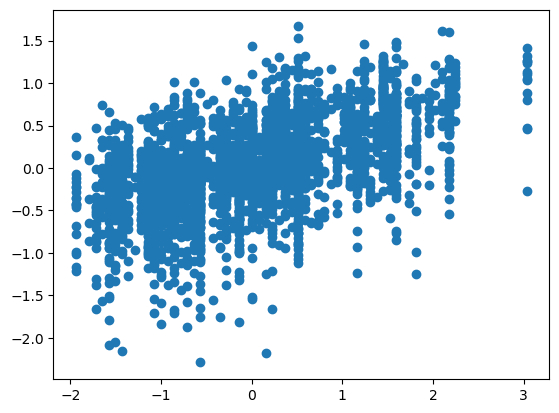

In [76]:
y_pred = Linreg.predict(X_forecast)
plt.scatter(y_forecast, y_pred)
plt.show()

In [78]:
test= pd.DataFrame(
        {'Model name': ['Линейная регрессия'],
        'R2': r2_score(y_forecast, y_pred),
        'MAE': mean_absolute_error(y_forecast, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_forecast, y_pred)),
        'EVS': explained_variance_score(y_forecast, y_pred)}
            )

In [80]:
#Регрессия опорных векторов
regr_svm = svm.SVR()
regr_svm.fit(X_train, y_train.values.ravel())

SVR()

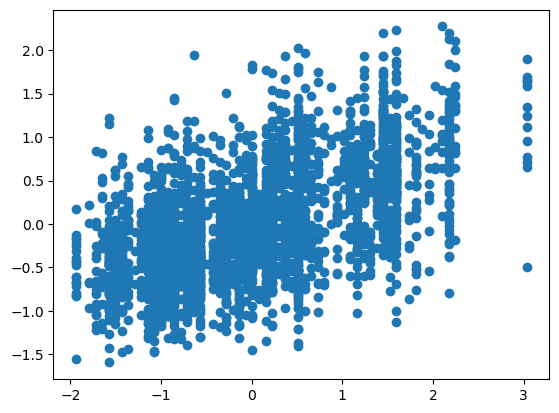

In [81]:
y_pred = regr_svm.predict(X_forecast)
plt.scatter(y_forecast, y_pred)
plt.show()

In [83]:
test.loc[len(test)]={'Model name': 'Регрессия поддерживающих векторов',
        'R2': r2_score(y_forecast, y_pred),
        'MAE': mean_absolute_error(y_forecast, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_forecast, y_pred)),
        'EVS': explained_variance_score(y_forecast, y_pred)}


In [86]:
#Лассо ларса
regr_sgd = linear_model.LassoLars(alpha=0.013)
regr_sgd.fit(X_train, y_train.values.ravel())

LassoLars(alpha=0.013)

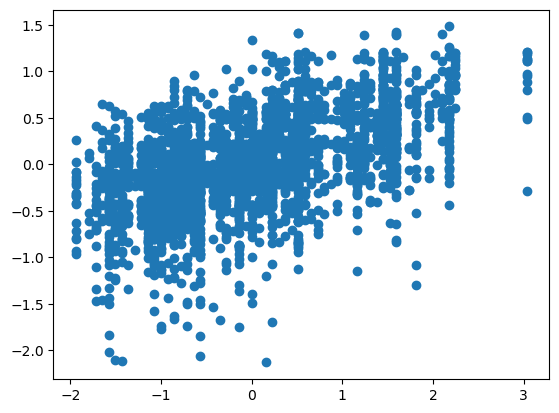

In [88]:
y_pred = regr_sgd.predict(X_forecast)
plt.scatter(y_forecast, y_pred)
plt.show()

In [90]:
test.loc[len(test)]={'Model name': 'Лассо ларса',
        'R2': r2_score(y_forecast, y_pred),
        'MAE': mean_absolute_error(y_forecast, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_forecast, y_pred)),
        'EVS': explained_variance_score(y_forecast, y_pred)}


In [92]:
print(test.to_string())

                          Model name        R2       MAE      RMSE       EVS
0                 Линейная регрессия  0.307521  0.675314  0.841117  0.307522
1  Регрессия поддерживающих векторов  0.287679  0.679284  0.853083  0.287690
2                        Лассо ларса  0.311990  0.674223  0.838399  0.312013


По параметру R2 можно сделать вывод, что все модели показывают не самый лучший вариант предсказания престижа работы по указанным в датасете параметрам. После проведения стандартизации и нормализации показатели моделей выровнялись.

Вычисление показателя престижности профессии по данным соцопроса очень расплывчато.